In [327]:
import numpy as np

def rgbeta(n: int, mean: float, var: float, min: float = 0, max: float = 1) -> float:
    dmin = mean - min
    dmax = max - mean

    if dmin <= 0 or dmax <= 0:
        raise ValueError(f"mean must be between min = {min} and max = {max}")

    if var >= dmin * dmax:
        raise ValueError(
            f"var must be less than (mean - min) * (max - mean) = {dmin * dmax}")

    mx = (mean - min) / (max - min)
    vx = var / (max - min) ** 2

    a = ((1 - mx) / vx - 1 / mx) * mx ** 2
    b = a * (1 / mx - 1)

    print(a, b)
    x = np.random.beta(a, b, n)
    y = (max - min) * x + min

    return y.tolist()

In [328]:
print(rgbeta(10, 2, 0.01, 0, 4))

199.5 199.5
[2.0697138240064548, 2.051236002825803, 1.8464623056470792, 1.9238722700405555, 2.166456220221578, 2.1550233629791102, 1.9236702244671298, 2.0060978083412344, 1.9750954297673868, 2.108896997743052]


In [329]:

def min_max_norm(X):
    min_x = np.min(X)
    max_x = np.max(X)
    return (X - min_x) / (max_x - min_x)


def sample_from_snd_vectorized_and_normalize(X: list[float], mean=0.5, sd=0.1):
    samples = np.random.normal(loc=mean, scale=sd, size=len(X)).clip(0, 1)
    return samples.tolist()

In [330]:
print(sample_from_snd_vectorized_and_normalize([1, 2, 3, 4, 5]))

[0.5427835540403252, 0.624193130991972, 0.6763081846665576, 0.4595324346491318, 0.5226371207758361]


637843130


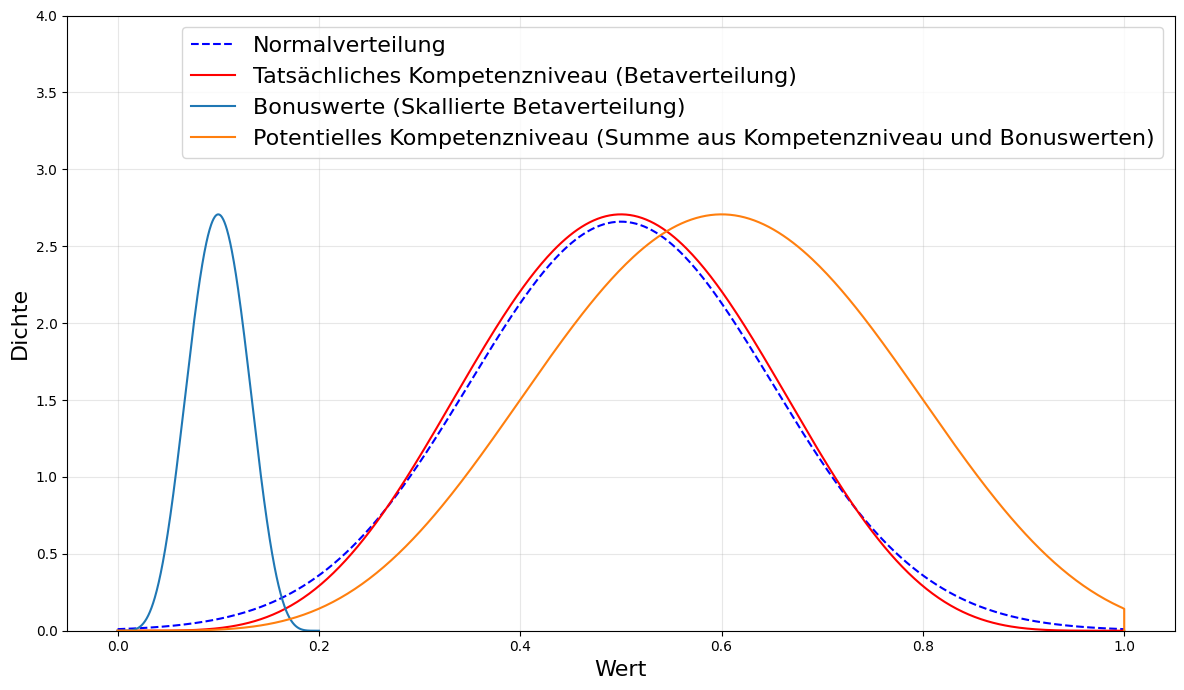

In [ ]:
from simulation_util import rgbeta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# nach links verschoben: 928692765


random_int = np.random.randint(0, 1000000000)
print(random_int)
# Set the random seed for reproducibility
np.random.seed(928692765)

def min_max_norm(X):
    min_x = np.min(X)
    max_x = np.max(X)
    return (X - min_x) / (max_x - min_x)

def sample_from_snd_vectorized_and_normalize(len: int, mean=0, sd=1):
    samples = np.random.normal(loc=mean, scale=sd, size=len)
    return min_max_norm(samples).tolist()

ab = 6
a = ab
b = ab
x = np.linspace(0, 1, 500)
y = beta.pdf(x, a=a, b=b)


mu = 0.5
sigma = 0.15  # Adjusted to roughly match width of Beta(5,5)
y_norm = norm.pdf(x, loc=mu, scale=sigma)

# Generate 10000 samples using rgbeta function
# samples = rgbeta(10000, 0.5, 0.002, 0, 0.1)
beta_samples = np.random.beta(a, b, 15000)
norm_samples = sample_from_snd_vectorized_and_normalize(15000)

samples = norm_samples

mean_value = np.mean(samples)



# Create histogram plot
plt.figure(figsize=(12, 7))
# plt.hist(samples, bins=100, density=True, alpha=0.5,
#          label='Histogram von Zufallswerten')
# Scale x values by 0.2
x_scaled = x 
y_scaled = y 

# Create histogram plot of samples
# plt.hist(samples, bins=100, density=True, alpha=0.5,
#          label='Histogram von Zufallswerten')

# Add a beta distribution scaled between 0 and 0.2
x_beta_scaled = np.linspace(0, 0.2, 500)
y_beta_scaled = beta.pdf(x_beta_scaled/0.2, a=a, b=b)  # Scale y values up by factor of 5

x_sum = np.clip(x_scaled + x_beta_scaled, 0, 1)

plt.plot(x, y_norm, label='Normalverteilung', color='blue', linestyle='--')
plt.plot(x_scaled, y_scaled, 'r-', label='Tatsächliches Kompetenzniveau (Betaverteilung)')
plt.plot(x_beta_scaled, y_beta_scaled,  label='Bonuswerte (Skallierte Betaverteilung)')
plt.plot(x_sum, y_beta_scaled, label='Potentielles Kompetenzniveau (Summe aus Kompetenzniveau und Bonuswerten)')

# Plot scaled beta distribution

# plt.axvline(x=mean_value, color='green', linestyle='--', 
#             label=f'Mittelwert ({mean_value:.4f})')


plt.ylim(0, 4)
plt.xlabel('Wert', fontsize=16)
plt.ylabel('Dichte', fontsize=16)
# plt.title('Häufigkeiten von 15000 Zufallswerten aus der Betaverteilung', fontsize=18)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

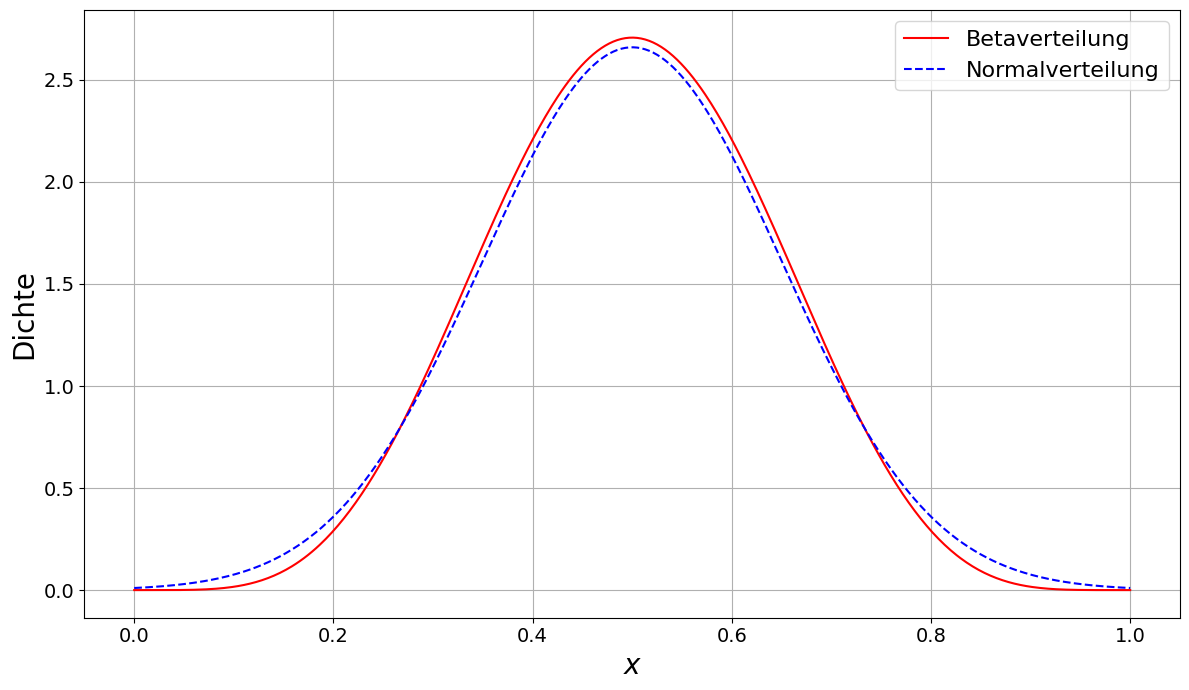

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# Parameters for Beta(5,5) distribution
ab = 6
a = ab
b = ab
x = np.linspace(0, 1, 500)
y_beta = beta.pdf(x, a=a, b=b)

# Parameters for normal distribution (centered at 0.5 to match beta)
mu = 0.5
sigma = 0.15  # Adjusted to roughly match width of Beta(5,5)
y_norm = norm.pdf(x, loc=mu, scale=sigma)

# Create the plot
plt.figure(figsize=(12,7))
plt.plot(x, y_beta, label='Betaverteilung', color='red')
plt.plot(x, y_norm, label='Normalverteilung', color='blue', linestyle='--')

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel('Dichte', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

637843130


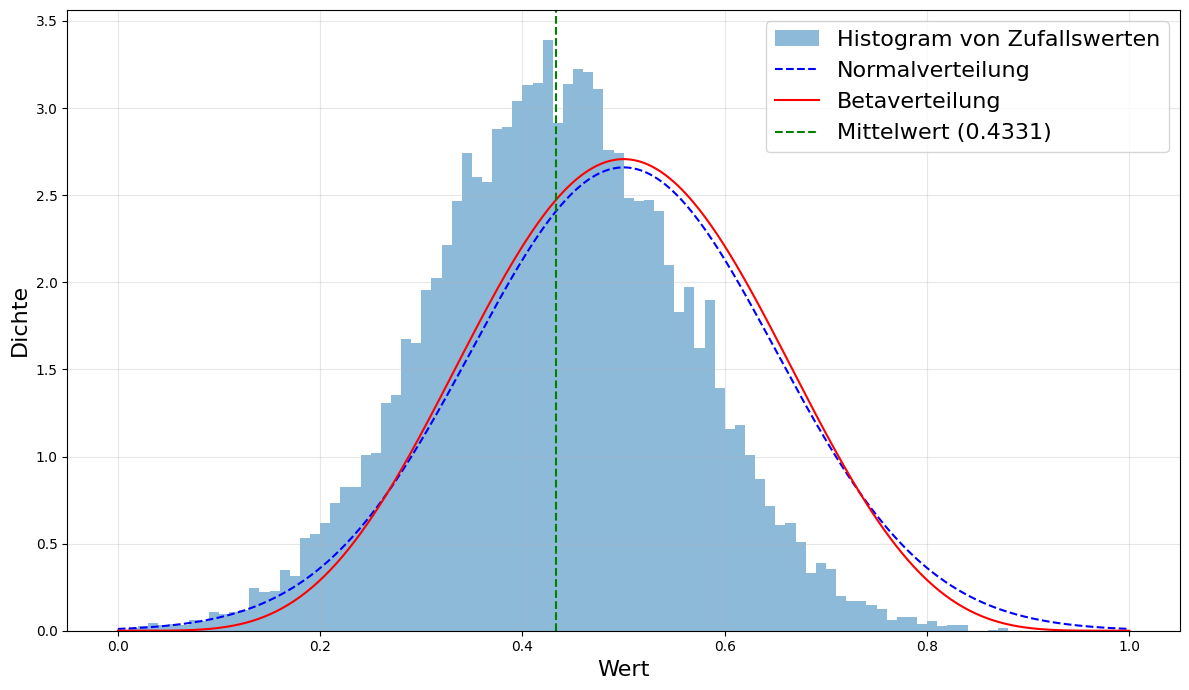

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# nach links verschoben: 928692765


random_int = np.random.randint(0, 1000000000)
print(random_int)
# Set the random seed for reproducibility
np.random.seed(928692765)

def min_max_norm(X):
    min_x = np.min(X)
    max_x = np.max(X)
    return (X - min_x) / (max_x - min_x)

def sample_from_snd_vectorized_and_normalize(len: int, mean=0, sd=1):
    samples = np.random.normal(loc=mean, scale=sd, size=len)
    return min_max_norm(samples).tolist()

ab = 6
a = ab
b = ab
x = np.linspace(0, 1, 500)
y = beta.pdf(x, a=a, b=b)


mu = 0.5
sigma = 0.15  # Adjusted to roughly match width of Beta(5,5)
y_norm = norm.pdf(x, loc=mu, scale=sigma)

# Generate 10000 samples using rgbeta function
# samples = rgbeta(10000, 0.5, 0.002, 0, 0.1)
beta_samples = np.random.beta(a, b, 15000)
norm_samples = sample_from_snd_vectorized_and_normalize(15000)

samples = norm_samples

mean_value = np.mean(samples)



# Create histogram plot
plt.figure(figsize=(12, 7))
plt.hist(samples, bins=100, density=True, alpha=0.5,
         label='Histogram von Zufallswerten')
# Scale x values by 0.2
x_scaled = x 
y_scaled = y 

# Add a beta distribution scaled between 0 and 0.2
x_beta_scaled = np.linspace(0, 0.2, 500)
y_beta_scaled = beta.pdf(x_beta_scaled/0.2, a=a, b=b)  # Scale y values up by factor of 5

x_sum = np.clip(x_scaled + x_beta_scaled, 0, 1)

plt.plot(x, y_norm, label='Normalverteilung', color='blue', linestyle='--')
plt.plot(x_scaled, y_scaled, 'r-', label='Betaverteilung')

plt.axvline(x=mean_value, color='green', linestyle='--', 
            label=f'Mittelwert ({mean_value:.4f})')


# plt.ylim(0, 4)
plt.xlabel('Wert', fontsize=16)
plt.ylabel('Dichte', fontsize=16)
plt.legend(fontsize=16, loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from EduData import get_data 

get_data("assistment-2009-2010-skill", "./data")



downloader, INFO http://base.ustc.edu.cn/data/ASSISTment/2009_skill_builder_data_corrected.zip is saved as data/2009_skill_builder_data_corrected.zip


downloader, INFO data/2009_skill_builder_data_corrected.zip is unzip to data/2009_skill_builder_data_corrected


'data/2009_skill_builder_data_corrected'

In [21]:
get_data("assistment-2017", "./data")

downloader, INFO http://base.ustc.edu.cn/data/ASSISTment/anonymized_full_release_competition_dataset.zip is saved as data/anonymized_full_release_competition_dataset.zip
downloader, INFO file existed, skipped


'data/anonymized_full_release_competition_dataset'

In [26]:
import pandas as pd

# file = './data/2009_skill_builder_data_corrected/skill_builder_data_corrected.csv'
file = "./data/anonymized_full_release_competition_dataset/anonymized_full_release_competition_dataset.csv"

# Load the dataset
df = pd.read_csv(file, encoding = "ISO-8859-1")

# Get the number of unique user IDs
num_unique_users = df['studentId'].nunique()

print(f"Number of different user IDs: {num_unique_users}")

/var/folders/3z/74rzpxmd7830lndj8xqp8t9w0000gn/T/ipykernel_38582/166268195.py:7: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding = "ISO-8859-1")


Number of different user IDs: 1709
